S12
/data/home/viscent/Light
/data/home/viscent/Light/Light/S12 Data.cnt
Reading 0 ... 1160999  =      0.000 ...  2321.998 secs...


/data/home/viscent/Light/LangouEEG/langouEEG.py:121: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(file_path, preload=True)


file info:
<Info | 9 non-empty values
 bads: 1 items (Trigger)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>
channel names:
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'Trigger']
time period:
1161000
events:
Used Annotations descriptions: ['11', '12', '8', '9']
{'random_flicker-60s': 1, 'random_rest-300s': 2, '40Hz_rest-300s': 3, '40Hz_flicker-60s': 4}
1 duplicate electrode labels found:
M1/Trigger
Plotting 66 uniq

/data/home/viscent/Light/LangouEEG/langouEEG.py:137: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mne.viz.plot_montage(layout)


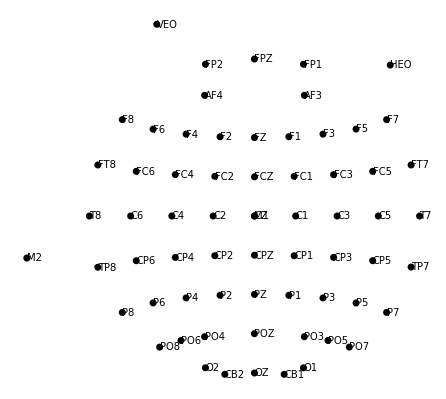

Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 30001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
6 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 6 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection ite

In [1]:
import os
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from copy import deepcopy
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
import sys
from langouEEG import *

picks_list = ['O1','O2','OZ']
pos_list = ['O']
sub_list = [12]
def savepsds(epoch, filename='default',fmin=30, fmax=50):
    psd, freqs = calc_psds(epoch, fmin=fmin, fmax=fmax, n_jobs=8, type='multitaper')
    print(np.shape(psd))
    save_psd(psd, freqs, './psds/{0}.csv'.format(filename), pad=10)
    return

for j in range(0, len(pos_list)):
    init_prog()
    for i in sub_list:
        if i<10:
            subject_name='S0'+str(i)
        else:
            subject_name='S'+str(i)
        print(subject_name)
        raw,picks,picks_str = initData_clean(subject_name, picks_str=picks_list)
        # raw.resample(100, npad="auto")
        events, event_dict=extractEvents(raw)
        initLayout(raw)
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,picks)
        # epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,picks, tmin_rest = 30,tmax_rest = 120,tmin_flick = -10,tmax_flick = 30)
        savepsds(epoch_4R, 'psd_4R')
        savepsds(epoch_4F, 'psd_4F')
        savepsds(epoch_RR, 'psd_RR')
        savepsds(epoch_RF, 'psd_RF')
